<a href="https://colab.research.google.com/github/MinByeongHyeon/ai/blob/main/Day9_%EC%95%88%EB%A9%B4%EC%9D%B8%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Client ID : hX47DQJLAsWkmvH1KEsM
# Client Secret : 4LzQLXAjS1

In [ ]:
import os         # 운영체제 접근
import sys        # 시스템 접근
import requests   # 웹 접근

client_id = "hX47DQJLAsWkmvH1KEsM"
client_secret = "4LzQLXAjS1"

url = "https://openapi.naver.com/v1/vision/face"    # 얼굴감지
# url = "https://openapi.naver.com/v1/vision/celebrity" # 유명인 얼굴인식

files = {'image': open('dog.jpg', 'rb')}             # 사진 파일이름

headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }
response = requests.post(url,  files=files, headers=headers)

rescode = response.status_code
if(rescode==200):
    print (response.text)
else:
    print("Error Code:" + rescode)

{"info":{"size":{"width":960,"height":1280},"faceCount":2},"faces":[{"roi":{"x":226,"y":410,"width":95,"height":95},"landmark":null,"gender":{"value":"female","confidence":0.625434},"age":{"value":"35~39","confidence":0.0583658},"emotion":{"value":"neutral","confidence":0.663911},"pose":{"value":"right_face","confidence":0.889649}},{"roi":{"x":467,"y":443,"width":36,"height":36},"landmark":{"leftEye":{"x":475,"y":452},"rightEye":{"x":492,"y":450},"nose":{"x":486,"y":457},"leftMouth":{"x":479,"y":470},"rightMouth":{"x":492,"y":470}},"gender":{"value":"female","confidence":0.999601},"age":{"value":"43~47","confidence":0.283628},"emotion":{"value":"neutral","confidence":0.871075},"pose":{"value":"frontal_face","confidence":0.644576}}]}


In [ ]:
import json

parsed = json.loads(response.text)
type(parsed)

dict

In [ ]:
print(json.dumps(parsed,indent=4))

{
    "info": {
        "size": {
            "width": 960,
            "height": 1280
        },
        "faceCount": 2
    },
    "faces": [
        {
            "roi": {
                "x": 226,
                "y": 410,
                "width": 95,
                "height": 95
            },
            "landmark": null,
            "gender": {
                "value": "female",
                "confidence": 0.625434
            },
            "age": {
                "value": "35~39",
                "confidence": 0.0583658
            },
            "emotion": {
                "value": "neutral",
                "confidence": 0.663911
            },
            "pose": {
                "value": "right_face",
                "confidence": 0.889649
            }
        },
        {
            "roi": {
                "x": 467,
                "y": 443,
                "width": 36,
                "height": 36
            },
            "landmark": {
                "leftEye":

In [ ]:
parsed.keys()
print(parsed['info'])
print(parsed['faces'][1])

{'size': {'width': 960, 'height': 1280}, 'faceCount': 2}
{'roi': {'x': 467, 'y': 443, 'width': 36, 'height': 36}, 'landmark': {'leftEye': {'x': 475, 'y': 452}, 'rightEye': {'x': 492, 'y': 450}, 'nose': {'x': 486, 'y': 457}, 'leftMouth': {'x': 479, 'y': 470}, 'rightMouth': {'x': 492, 'y': 470}}, 'gender': {'value': 'female', 'confidence': 0.999601}, 'age': {'value': '43~47', 'confidence': 0.283628}, 'emotion': {'value': 'neutral', 'confidence': 0.871075}, 'pose': {'value': 'frontal_face', 'confidence': 0.644576}}


In [ ]:
len(parsed.keys())

2

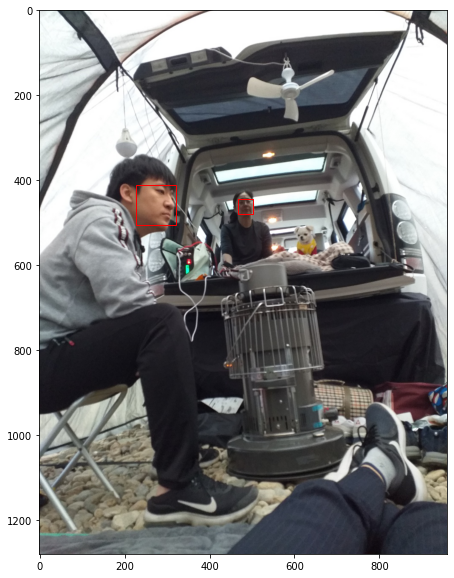

In [ ]:
import matplotlib.patches as patches      # 사진 수정 관련 모듈
import matplotlib.image as mpimg          # 사진 읽어오는 모듈
import matplotlib.pyplot as plt           # 사진 관련 


img = mpimg.imread('dog.jpg')              # 사진 읽어오기
fig, ax = plt.subplots(figsize=(10,10))    # 사진을 표시할 액자와 사진 설정
ax.imshow(img)                             # 액자에 사진 삽입 

for n in range(len(parsed.keys())):
  x,y,w,h = parsed['faces'][n]['roi'].values() # 인식한 얼굴의 roi 위치정보를 변수로 할당

  re_face = patches.Rectangle((x,y),w,h, facecolor='none',edgecolor='r') # 그 위치에 사각형을 표시

  ax.add_patch(re_face)                       # 사진 수정

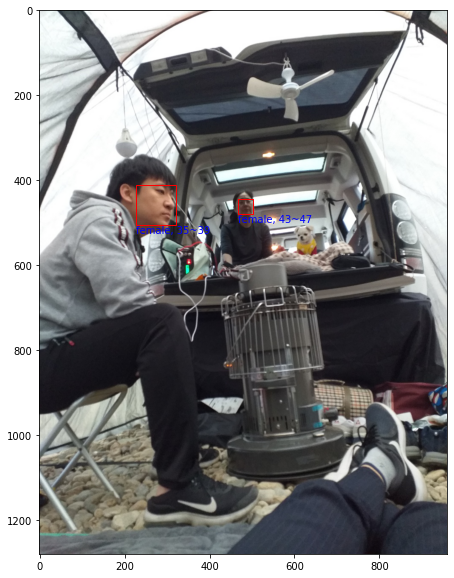

In [ ]:
import matplotlib.patches as patches      # 사진 수정 관련 모듈
import matplotlib.image as mpimg          # 사진 읽어오는 모듈
import matplotlib.pyplot as plt           # 사진 관련 

img = mpimg.imread('dog.jpg')              # 사진 읽어오기
fig, ax = plt.subplots(figsize=(10,10))    # 사진을 표시할 액자와 사진 설정
ax.imshow(img)                             # 액자에 사진 삽입 
# 각 사람의 얼굴 아래(또는 오른쪽)에 성별, 나이 정보 출력
for n in range(len(parsed.keys())):
  x,y,w,h = parsed['faces'][n]['roi'].values() # 인식한 얼굴의 roi 위치정보를 변수로 할당
  age , age_conf = parsed['faces'][n]['age'].values()         # 인식한 얼굴의 나이를 변수로 할당
  gender , gender_conf = parsed['faces'][n]['gender'].values() # 인식한 얼굴의 성별을 변수로 할당

  anno = gender + ', ' + age

  re_face = patches.Rectangle((x,y),w,h, facecolor='none',edgecolor='r') # 그 위치에 사각형을 표시

  plt.text(x,y+h+20,anno,color='blue')
  ax.add_patch(re_face)                       # 사진 수정

{"info":{"size":{"width":960,"height":1280},"faceCount":4},"faces":[{"roi":{"x":636,"y":357,"width":151,"height":151},"landmark":{"leftEye":{"x":665,"y":393},"rightEye":{"x":735,"y":388},"nose":{"x":686,"y":433},"leftMouth":{"x":667,"y":475},"rightMouth":{"x":726,"y":474}},"gender":{"value":"male","confidence":0.99995},"age":{"value":"29~33","confidence":1.0},"emotion":{"value":"neutral","confidence":1.0},"pose":{"value":"frontal_face","confidence":0.996721}},{"roi":{"x":177,"y":391,"width":121,"height":121},"landmark":{"leftEye":{"x":210,"y":431},"rightEye":{"x":257,"y":429},"nose":{"x":233,"y":456},"leftMouth":{"x":212,"y":481},"rightMouth":{"x":268,"y":479}},"gender":{"value":"male","confidence":0.999975},"age":{"value":"60~64","confidence":0.303958},"emotion":{"value":"smile","confidence":0.995915},"pose":{"value":"frontal_face","confidence":0.997812}},{"roi":{"x":490,"y":256,"width":69,"height":69},"landmark":{"leftEye":{"x":510,"y":272},"rightEye":{"x":540,"y":271},"nose":{"x":52

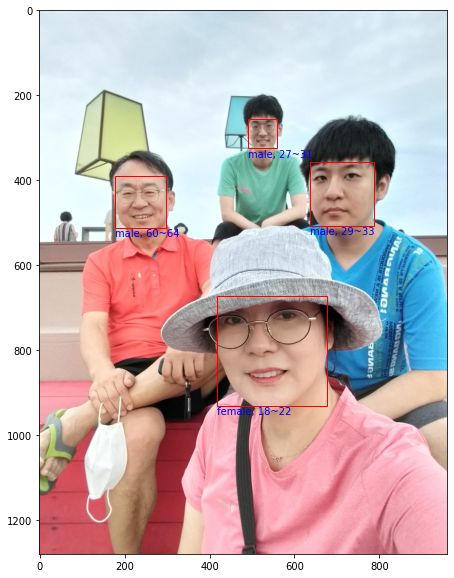

In [ ]:
import os         # 운영체제 접근
import sys        # 시스템 접근
import requests   # 웹 접근

client_id = "hX47DQJLAsWkmvH1KEsM"
client_secret = "4LzQLXAjS1"

url = "https://openapi.naver.com/v1/vision/face"    # 얼굴감지
# url = "https://openapi.naver.com/v1/vision/celebrity" # 유명인 얼굴인식

files = {'image': open('family.jpg', 'rb')}             # 사진 파일이름

headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }
response = requests.post(url,  files=files, headers=headers)

rescode = response.status_code
if(rescode==200):
    print (response.text)
else:
    print("Error Code:" + rescode)

######################
import json

parsed = json.loads(response.text)

########################

import matplotlib.patches as patches      # 사진 수정 관련 모듈
import matplotlib.image as mpimg          # 사진 읽어오는 모듈
import matplotlib.pyplot as plt           # 사진 관련 

img = mpimg.imread('family.jpg')              # 사진 읽어오기
fig, ax = plt.subplots(figsize=(10,10))    # 사진을 표시할 액자와 사진 설정
ax.imshow(img)                             # 액자에 사진 삽입 

# 각 사람의 얼굴 아래(또는 오른쪽)에 성별, 나이 정보 출력
for each in parsed['faces']:
  x,y,w,h = each['roi'].values()         # 인식한 얼굴의 roi 위치정보를 변수로 할당
  age , age_conf = each['age'].values()         # 인식한 얼굴의 나이를 변수로 할당
  gender , gender_conf = each['gender'].values() # 인식한 얼굴의 성별을 변수로 할당

  anno = gender + ', ' + age

  re_face = patches.Rectangle((x,y),w,h, facecolor='none',edgecolor='r') # 그 위치에 사각형을 표시

  plt.text(x,y+h+20,anno,color='blue')
  ax.add_patch(re_face)                       # 사진 수정